# Generate tabular data using a generative adversarial network
Use the wine dataset as the input data

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
class_0 = X_scaled[y == 0]
class_1 = X_scaled[y == 1]
class_2 = X_scaled[y == 2]

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dense(output_dim, activation='tanh')
    ])
    return model

def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
def train_gan(generator, discriminator, data, epochs=10000, batch_size=32):
    for epoch in range(epochs):
        # Train discriminator
        real_samples = data[np.random.randint(0, data.shape[0], batch_size)]
        fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, generator.input_shape[1])))
        d_loss_real = discriminator.train_on_batch(real_samples, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_samples, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, generator.input_shape[1]))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")

input_dim = 10
output_dim = X_scaled.shape[1]
epochs = 10 # use a small number for a short test
new_samples = []
for class_data in [class_0, class_1, class_2]:
    generator = build_generator(input_dim, output_dim)
    discriminator = build_discriminator(output_dim)
    gan = tf.keras.Sequential([generator, discriminator])
    discriminator.compile(optimizer='adam', loss='binary_crossentropy')
    gan.compile(optimizer='adam', loss='binary_crossentropy')

    train_gan(generator, discriminator, class_data, epochs=epochs)
    new_samples.append(generator.predict(np.random.normal(0, 1, (100, input_dim))))

In [23]:
new_samples_class_0 = new_samples[0]
new_samples_class_1 = new_samples[1]
new_samples_class_2 = new_samples[2]

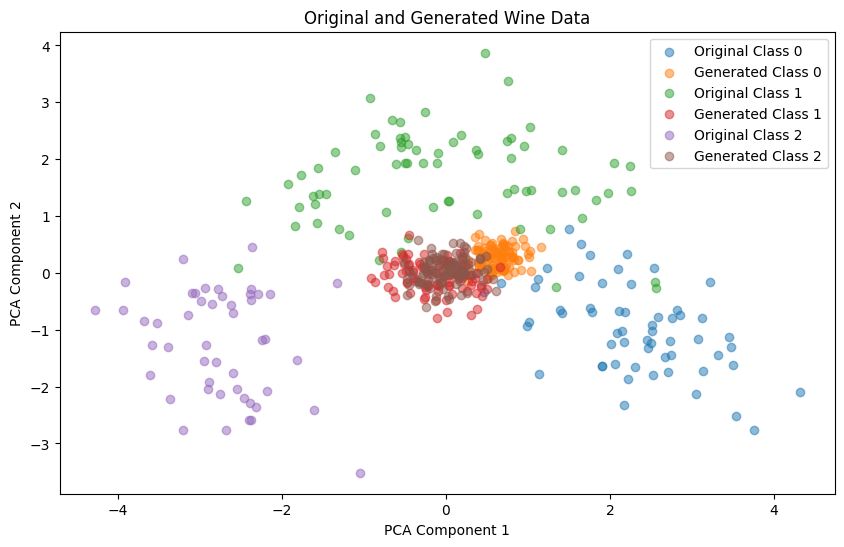

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine Dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Preprocess the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Combine the generated samples from all classes
generated_samples = np.vstack([new_samples_class_0, new_samples_class_1, new_samples_class_2])
generated_labels = np.hstack([np.zeros(new_samples_class_0.shape[0]), np.ones(new_samples_class_1.shape[0]), np.full(new_samples_class_2.shape[0], 2)])

# Fn to plot the data
def plot_data(original_data, generated_data, labels, title):
    pca = PCA(n_components=2)
    original_data_2d = pca.fit_transform(original_data)
    generated_data_2d = pca.transform(generated_data)

    plt.figure(figsize=(10, 6))
    for label in np.unique(labels):
        plt.scatter(original_data_2d[labels == label, 0], original_data_2d[labels == label, 1], label=f'Original Class {label}', alpha=0.5)
        # print(generated_data_2d[labels == label, 0].shape, generated_data_2d[labels == label, 1].shape)
        plt.scatter(generated_data_2d[generated_labels == label, 0], generated_data_2d[generated_labels == label, 1], label=f'Generated Class {label}', alpha=0.5)

    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

# Plot the original and generated data
plot_data(X_scaled, generated_samples, y, 'Original and Generated Wine Data')